<a href="https://colab.research.google.com/github/sultankeles/machineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN (K-Nearest Neighbor)

#### Binary Classification

Accuracy: 0.9590643274853801
Confusion Matrix:
[[ 59   4]
 [  3 105]]


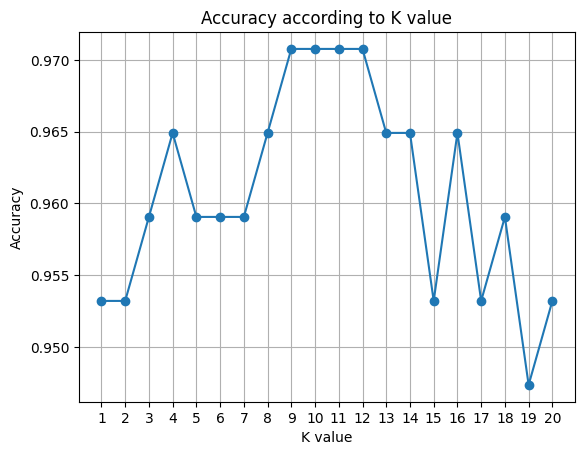

In [ ]:
# sklearn: ML Library

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 1- Dataset Review
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target  # Added target column

# 2- Choosing a machine learning model - (KNN : selected model)

# 3- Training the model
X = cancer.data # features
y = cancer.target # target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# Scaling (Preprocessing function)
scaler = StandardScaler() # Scales the dataset
X_train = scaler.fit_transform(X_train) # to scale the parameters - Learn(w/.fit()) and apply(w/ .transform())
X_test = scaler.transform(X_test) # Apply parameters learned from X_train dataset to X_test dataset


# Create and train knn model
knn = KNeighborsClassifier(n_neighbors=3)  # Model building
knn.fit(X_train, y_train) # fit() function trains the knn algorithm using data (samples + target)



# 4- Test / Evaluation
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix) # Number of correct and incorrect predictions


# 5- Hyperparameter tuning
'''
KNN: Hyperparameter = K
    K: Number of neighbors to consider when making a prediction. (1, 2, 3, ...., n)
    Accuracy: %A, %B, %C ...
'''
accuracy_values = []
k_values = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_values.append(accuracy) # append: one of the simple list commands(add into)
  k_values.append(k)

plt.figure()
plt.plot(k_values, accuracy_values, marker = 'o', linestyle = '-')
plt.title('Accuracy according to K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

#### Regression

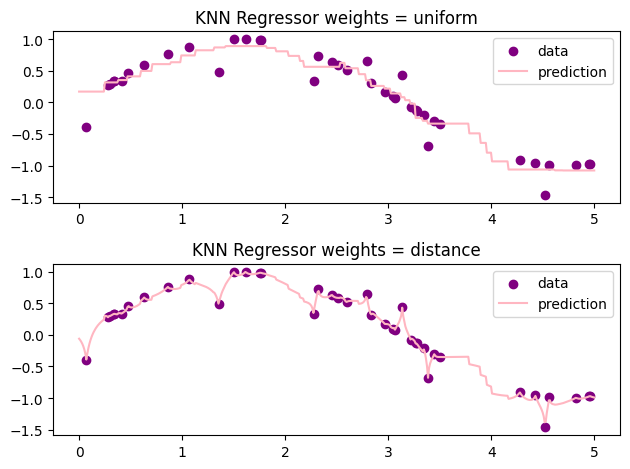

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X = np.sort(5 * np.random.rand(40, 1), axis = 0) # X: features created with uniform distribution  /  sort: order from largest to smallest or smallest to largest
y = np.sin(X).ravel() # target  /  ravel(): used to contiguous flattened array

# plt.plot(X, y)  # We don't see the gaps with plot() function.
# plt.scatter(X, y)  # scatter(): shows gaps

# Add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

# plt.scatter(X, y) # Random noisy dots interleaved in 5 steps

T = np.linspace(0, 5, 500)[:, np.newaxis] # T: test dataset

for i, weight in enumerate(['uniform', 'distance']):
  knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
  y_pred = knn.fit(X, y).predict(T)

# plt.figure()  # Shows in two different plots
  plt.subplot(2, 1, i+1)  # Shows in a single plot
  plt.scatter(X, y, color = 'purple', label = 'data')
  plt.plot(T, y_pred, color = 'lightpink', label = 'prediction')
  plt.axis('tight')
  plt.legend()  # Makes labels visible
  plt.title('KNN Regressor weights = {}'.format(weight))

plt.tight_layout()
plt.show()

### Decision Tree

#### Classification

##### Practice - 1

Accuracy: 1.0
conf_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


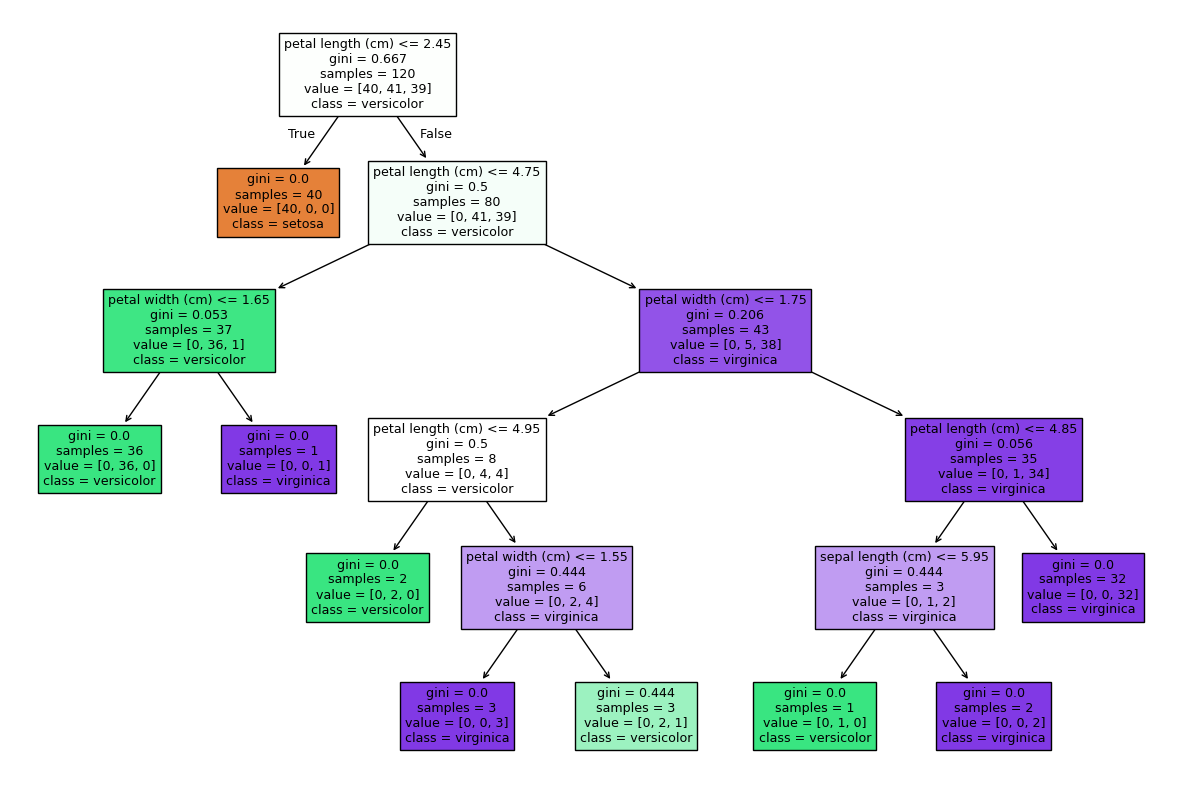

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# Dataset review
iris = load_iris()

X = iris.data # features
y = iris.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# DT model creation and train
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42) # criterion='entropy'
tree_clf.fit(X_train, y_train)

# DT Evaluation
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('conf_matrix:')
print(conf_matrix)

plt.figure(figsize = (15, 10))
plot_tree(tree_clf, filled = True, feature_names = iris.feature_names, class_names = list(iris.target_names))
plt.show()

feature_importances = tree_clf.feature_importances_

feature_names = iris.feature_names

feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)

for importance, feature_name in feature_importances_sorted:
  print(f'{feature_name}: {importance}')



##### Practice - 2

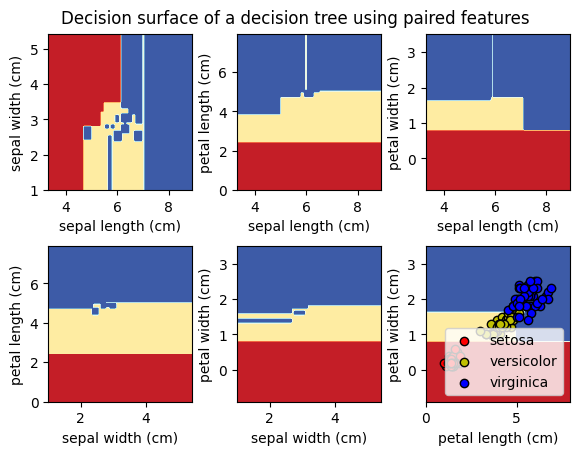

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import numpy as np

# If you don't want to see warnings:
import warnings
warnings.filterwarnings('ignore')

# Dataset review
iris = load_iris()

n_classes = len(iris.target_names)
plot_colors = 'ryb'

for pairidx, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):

  X = iris.data[:, pair]  # features
  y = iris.target # target

  clf = DecisionTreeClassifier().fit(X, y)

  ax = plt.subplot(2, 3, pairidx + 1)
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
  DecisionBoundaryDisplay.from_estimator(clf,
                                         X,
                                         cmap = plt.cm.RdYlBu,
                                         response_method = 'predict',
                                         ax = ax,
                                         xlabel=iris.feature_names[pair[0]],
                                         ylabel=iris.feature_names[pair[1]])
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i], cmap = plt.cm.RdYlBu, edgecolors='black')

plt.suptitle('Decision surface of a decision tree using paired features')
plt.legend()
plt.show()



#### Regression

##### Practice - 1

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import numpy as np

diabetes = load_diabetes()

X = diabetes.data # features
y = diabetes.target # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree Regression Model
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

# Prediction
y_pred = tree_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)


MSE: 4976.797752808989
RMSE: 70.54642267903446


##### Practice - 2

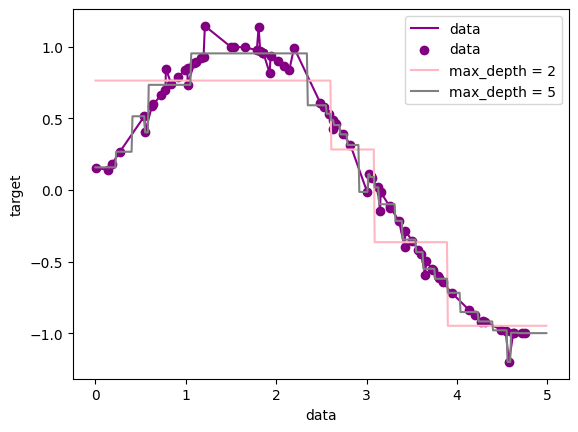

In [ ]:
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt

# Create a dataset
X = np.sort(5* np.random.rand(80, 1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(16))  # Added random noise

#plt.scatter(X, y)

# Building 2 regressors at different depths
regr1 = DecisionTreeRegressor(max_depth = 2)
regr2 = DecisionTreeRegressor(max_depth = 5)

# Train
regr1.fit(X, y)
regr2.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

plt.figure()
plt.plot(X, y, color = 'darkmagenta', label = 'data')
plt.scatter(X, y, c = 'purple', label = 'data')
plt.plot(X_test, y_pred1, color = 'lightpink', label = 'max_depth = 2')
plt.plot(X_test, y_pred2, color = 'gray', label = 'max_depth = 5')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()